In [8]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow_datasets as tfds

In [7]:
# tfds.load returns a tf.data.Dataset object and a tf.core.DatasetInfo object. The latter contains info about how the set is split 
# into test and train, number of examples and names of features
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True) 
train_dataset, test_dataset = dataset['train'], dataset['test']

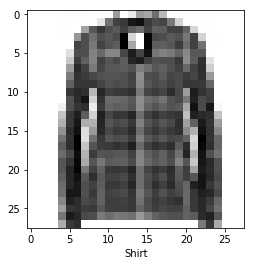

In [3]:
# Human readable labels for the classes
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal',      'Shirt',   'Sneaker',  'Bag',   'Ankle boot']
# Print example
for (image, label) in train_dataset.take(1):
    image = image.numpy().reshape((28,28))
    plt.imshow(image, cmap= plt.cm.binary)
    plt.xlabel(class_names[label])

In [6]:
# Size of training and test sets
train_size = metadata.splits['train'].num_examples
test_size = metadata.splits['test'].num_examples
# Normalise data
def minmaxScaling(images, labels):
    images = tf.cast(images, tf.float32)
    images = images/255
    return images, labels

train_dataset = train_dataset.map(minmaxScaling)
test_dataset = test_dataset.map(minmaxScaling)
print(train_size, test_size)

60000 10000


In [5]:
# Convolutional Model setup
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters= 16, kernel_size = 2, padding = 'same', activation=('relu')),
    tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'),
    #tf.keras.layers.Conv2D(filters= 32, kernel_size = 2, padding = 'same', activation=('relu')),
    #tf.keras.layers.MaxPooling2D(pool_size=2, padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=10, input_shape=([1]), activation=('softmax'))
])
# Compile model
model.compile(loss='sparse_categorical_crossentropy', 
              optimizer = 'adam',
              metrics=['accuracy'])

In [6]:
# Shuffling and splitting of training set 
BATCH_SIZE = 32
train_dataset = train_dataset.repeat().shuffle(train_size).batch(BATCH_SIZE)
test_dataset_batched = test_dataset.batch(BATCH_SIZE)

In [7]:
# Training model 
trained = model.fit(train_dataset, epochs=5, verbose=True, steps_per_epoch=np.ceil(train_size/BATCH_SIZE))

Epoch 1/5
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


1875/1875 [==============================] - 55s 29ms/step - loss: 0.4918 - accuracy: 0.7753
Epoch 2/5
1875/1875 [==============================] - 44s 24ms/step - loss: 0.3569 - accuracy: 0.8711
Epoch 3/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.3176 - accuracy: 0.8855
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2972 - accuracy: 0.8937
Epoch 5/5
1875/1875 [==============================] - 53s 28ms/step - loss: 0.2818 - accuracy: 0.8971


In [8]:
# Evaluation on test set
test_loss, test_acc = model.evaluate(test_dataset_batched, steps=np.ceil(test_size/BATCH_SIZE))
predictions = model.predict(test_dataset_batched)

313/313 [==============================] - 6s 20ms/step - loss: 0.3116 - accuracy: 0.8875


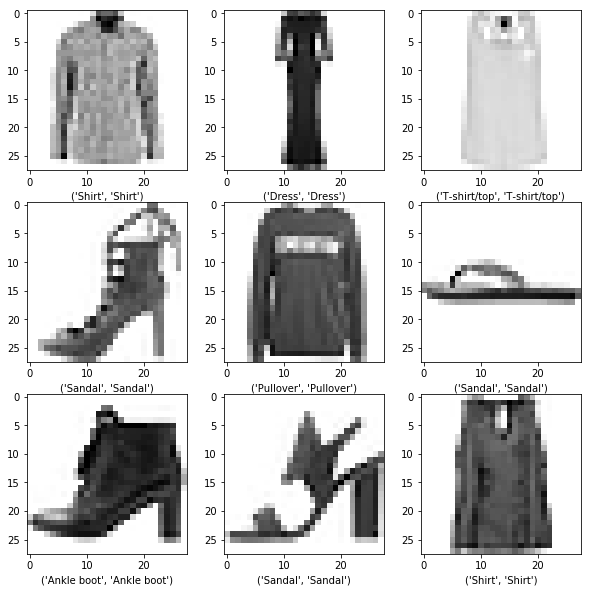

In [9]:
# Print example and its predicted class
plt.figure(figsize=(10,10))

i = 0
for (image, label) in test_dataset.take(9):
    image = image.numpy().reshape((28,28))
    plt.subplot(3,3,i+1)
    plt.imshow(image, cmap= plt.cm.binary)
    plt.xlabel((class_names[label], class_names[predictions[i].argmax()]))
    i += 1
plt.show()